Lab 4:  Language Processing 
==

byJonathan Houston (omu075)

I. Data
==

Upload data and use Latin-1 encoding

In [2]:
import pandas as pd
trainDF = pd.read_csv("training.csv", names = ('Score','ID','Date', 'Query', 'User', 'Tweet'), encoding = "ISO-8859-1")
trainDF.head()

,Score,ID,Date,Query,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Load the features into X and the labels into Y. At minimum, the features will include the
text of the tweet, and the labels will be the category , in this case i used 0, 1, 2

In [4]:
data = []
data_labels = []
nbrNegative = 0
nbrNeutral = 0
nbrPositive = 0

for index, row in trainDF.iterrows():
  if row['Score'] == 0:
    data.append(row['Tweet']) 
    data_labels.append('0')
    nbrNegative += 1
  if row['Score'] == 2:
    data.append(row['Tweet']) 
    data_labels.append('1')
    nbrNeutral += 1
  if row['Score'] == 4:
    data.append(row['Tweet']) 
    data_labels.append('2')
    nbrPositive += 1
    
print("Finished: \n Data Size: %d \n Label Size: %d" % (len(data), len(data_labels)))

Finished: 
 Data Size: 1586588 
 Label Size: 1586588


Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(trainDF['Tweet'], trainDF['Score'], test_size=0.2)

print("Finished")

Finished


 Use the CountVectorizer
from sklearn to convert the data into a matrix of token counts (stopwords is needed)

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
 
vectorizer = CountVectorizer(binary=True, stop_words=stopwords.words('english'), 
                             lowercase=True, min_df=3, max_df=0.9, max_features=5000)
X_train_onehot = vectorizer.fit_transform(X_train)

Bar chart

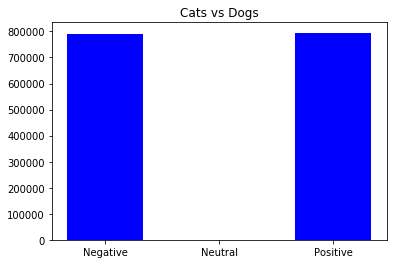

In [11]:
import plotly.plotly as py
import plotly.tools as tls
import matplotlib.pyplot as plt

# Display a bar chart to show the number of images in each category, in both the training
# and testing data.
plt.title("Cats vs Dogs")
y = [nbrNegative, nbrNeutral, nbrPositive]
x = ['Negative', 'Neutral', 'Positive']
width = 1/1.5
plt.bar(x, y, width, color="blue")
plt.show()

II. Classification
===

Create a neural network using Keras and add at least 2 hidden layers.

Use the summary on your Keras model to display a full summary of your model.

In [13]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()
 
model.add(Dense(units=500, activation='relu', input_dim=len(vectorizer.get_feature_names())))
model.add(Dense(units=5, activation='sigmoid'))
 
model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               2500500   
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 2505      
Total params: 2,503,005
Trainable params: 2,503,005
Non-trainable params: 0
_________________________________________________________________


Train your model, using fit from Keras. 

In [16]:
model.fit(X_train_onehot[:-100], y_train[:-100], 
          epochs=1, batch_size=128, verbose=1, 
          validation_data=(X_train_onehot[-100:], y_train[-100:]))

Instructions for updating:
Use tf.cast instead.
Train on 1269170 samples, validate on 100 samples
Epoch 1/1
1269170/1269170 [==============================] - 539s 425us/step - loss: 0.7452 - acc: 0.5004 - val_loss: 0.6950 - val_acc: 0.5100


III. Evaluation
===

Use the classification_report from scikit-learn to report precision, recall, and f1-score.

In [18]:
scores = model.evaluate(vectorizer.transform(X_test), y_test, verbose=1)

317318/317318 [==============================] - 85s 269us/step


In [19]:
print("Accuracy:", scores[1]) 

Accuracy: 0.5059152017845845


In [17]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# predict probabilities for test set
yhat_probs = model.predict(vectorizer.transform(X_test), verbose=0)

# predict crisp classes for test set
yhat_classes = model.predict_classes(vectorizer.transform(X_test), verbose=0)

# accuracy: (tp + tn) / (p + n)
#accuracy = accuracy_score(y_test, yhat_classes)
#print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, pos_label=4)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, pos_label=4)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes, pos_label=4)
print('F1 score: %f' % f1)


Precision: 0.504611
Recall: 0.861127
F1 score: 0.636336


Visualize your results by displaying a ROC curve - a probability curve plotting the true
positive rate against the false positive rate. Put FPR on the x-axis and TPR on the y-axis.
Use roc_curve from scikit-learn to help with this step.

In [23]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_classes)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Cohens kappa: 0.009024
ROC AUC: 0.504499
[[ 23368 134661]
 [ 22121 137168]]


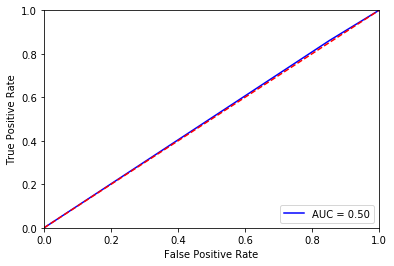

In [24]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, yhat_classes, pos_label=4)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()